Dans cette première partie, on va effectuer les statistiques descriptives afin de comprendre la base de données que nous avons à disposition.

In [1]:
import numpy as np
np.set_printoptions() # Remettre à zéro les options d'affichage des résultats de np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcdefaults() # remise à zeros des param graphiques
%matplotlib inline

In [2]:
df=pd.read_csv('LifeExp.csv', encoding='ISO-8859-1', sep=',', decimal='.')

In [3]:
print(df.head(2))
df.describe()

   Naiss  Mort  MortInf  EspHommes  EspFemmes     PNB    Region      Pays
0   24.7   5.7     30.8       69.6       75.5   600.0  East.Eur   Albania
1   12.5  11.9     14.4       68.3       74.7  2250.0  East.Eur  Bulgaria


,Naiss,Mort,MortInf,EspHommes,EspFemmes,PNB
count,97.000000,97.000000,97.000000,97.000000,97.000000,91.000000
mean,29.229897,10.836082,54.901031,61.485567,66.151134,5741.252747
std,13.546695,4.647495,45.992584,9.615970,11.005391,8093.679853
min,9.700000,2.200000,4.500000,38.100000,41.200000,80.000000
25%,14.500000,7.800000,13.100000,55.800000,57.500000,475.000000
50%,29.000000,9.500000,43.000000,63.700000,67.800000,1690.000000
75%,42.200000,12.500000,83.000000,68.600000,75.400000,7325.000000
max,52.200000,25.000000,181.600000,75.900000,81.800000,34064.000000


In [4]:
print(df.nunique()) # nombres de variables différentes dans le dataframe

Naiss        82
Mort         73
MortInf      84
EspHommes    82
EspFemmes    83
PNB          83
Region        6
Pays         97
dtype: int64


In [5]:
df['Region'].nunique() # nombre de régions

6

In [6]:
print('Nombre de valeurs différentes pour région East.Eur:', len(df[df['Region'] == 'East.Eur']))  

Nombre de valeurs différentes pour région East.Eur: 11


In [7]:
print(df.nlargest(1, 'PNB')) #ligne correspondant a la ligne qui a le plus haut PNB
print(df.nsmallest(1, 'PNB')) #ligne correspondant a la ligne qui a le plus petit PNB


    Naiss  Mort  MortInf  EspHommes  EspFemmes      PNB Region         Pays
36   12.5   9.5      7.1       73.9       80.0  34064.0  Other  Switzerland
    Naiss  Mort  MortInf  EspHommes  EspFemmes   PNB  Region        Pays
83   45.0  18.5    141.0       44.9       48.1  80.0  Africa  Mozambique


In [8]:
pd.set_option("display.precision", 1)
grouped = df.groupby('Region')

for name, group in grouped:
    print('\n' + name)
    print('\n' +'Nb de pays:', len(group))
    print('\n' +'Nom des pays:', ', '.join(group['Pays'].tolist()))
    print('\n' +'PNB moyen:', group['PNB'].mean())


Africa

Nb de pays: 27

Nom des pays: Algeria, Angola, Botswana, Congo, Egypt, Ethiopia, Gabon, Gambia, Ghana, Kenya, Libya, Malawi, Morocco, Mozambique, Namibia, Nigeria, Sierra_Leone, Somalia, South_Africa, Sudan, Swaziland, Tunisia, Uganda, Tanzania, Zaire, Zambia, Zimbabwe

PNB moyen: 852.5925925925926

Asia

Nb de pays: 16

Nom des pays: Bangladesh, Cambodia, China, Hong_Kong, India, Indonesia, Korea, Malaysia, Mongolia, Nepal, Pakistan, Philippines, Singapore, Sri_Lanka, Thailand, Vietnam

PNB moyen: 2498.4615384615386

East.Eur

Nb de pays: 11

Nom des pays: Albania, Bulgaria, Czechoslovakia, Former_E._Germany, Hungary, Poland, Romania, Yugoslavia, Russia, Bielorussia, Ukrainia

PNB moyen: 1931.3333333333333

LatinAmer

Nb de pays: 12

Nom des pays: Argentina, Bolivia, Brazil, Chile, Columbia, Ecuador, Guyana, Paraguay, Peru, Uruguay, Venezuela, Mexico

PNB moyen: 1672.5

MiddleEast

Nb de pays: 12

Nom des pays: Afghanistan, Bahrain, Iran, Iraq, Israel, Jordan, Kuwait, Lebanon

Text(0.5, 1.0, 'Boxplots des régions par PNB')

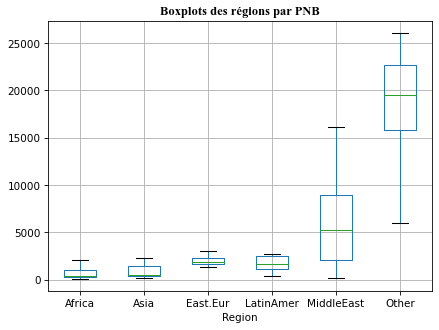

In [9]:
plt.rcParams['figure.dpi'] = 75
df.boxplot(by='Region', column='PNB', showfliers=False)
plt.suptitle("")
plt.title('Boxplots des régions par PNB', fontweight='bold', fontname='Times New Roman')

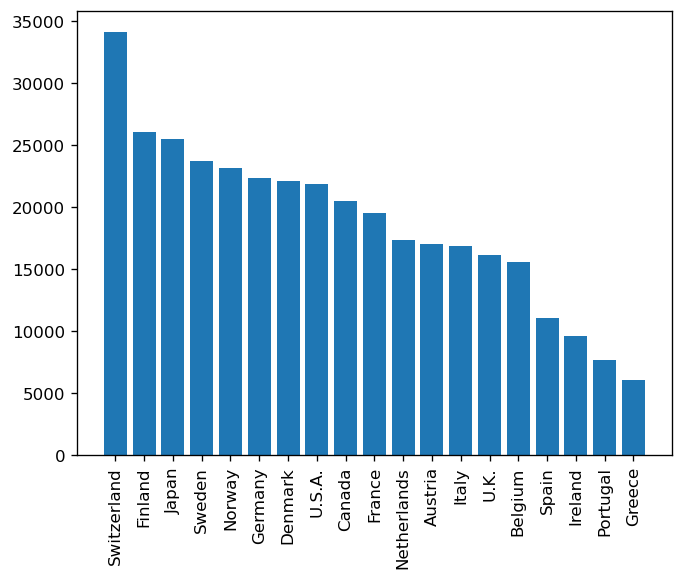

In [10]:
plt.rcParams['figure.dpi'] = 120

df1=df[df['Region'] == 'Other'].sort_values(by='PNB', ascending=False)
plt.bar(df1['Pays'], df1['PNB'])

xnames=list(df1['Pays'].unique())
nbnames=len(xnames)
#diagramme en barre 
plt.xticks(np.arange(0,nbnames),xnames,rotation=90)
plt.show()

Le but de cette partie est d'appliquer une régression de l'espérence des vie des hommes sur le PNB

In [11]:
np.set_printoptions() # Remettre à zéro les options d'affichage des résultats de np
plt.rcdefaults() # remise à zeros des param graphiques
plt.rcParams['figure.dpi'] = 75

In [12]:
df=pd.read_csv('LifeExp.csv', encoding='ISO-8859-1', sep=',', decimal='.').dropna()

In [13]:
liste_reg = df['Region'].unique()
couleur = [list(liste_reg).index(reg) for reg in df['Region']]
print(couleur)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5]


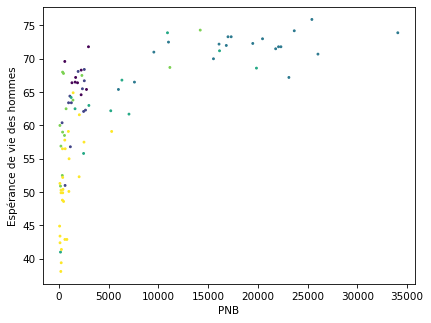

In [14]:
x= df['PNB']
y = df['EspHommes']
plt.scatter(x,y, s=3, c=couleur)
plt.xlabel('PNB')
plt.ylabel("Espérance de vie des hommes")
plt.show()

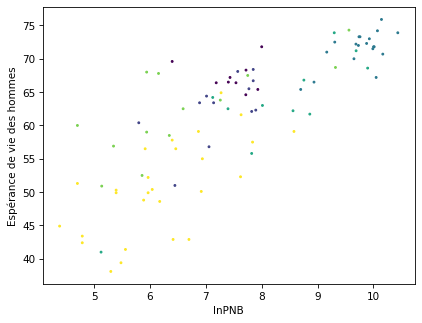

In [15]:
# On va transformer le PNB en logarithme afin d'appliquer une régression linéaire.
df['lnPNB'] = np.log(df['PNB'])
plt.scatter(df['lnPNB'], y, s=3, c=couleur)
plt.xlabel('lnPNB')
plt.ylabel("Espérance de vie des hommes")
plt.show()


In [16]:
from sklearn.linear_model import LinearRegression
y = df['EspHommes'].values
x = df['lnPNB'].values
model = LinearRegression(fit_intercept=True)
 # Modèle de régression linéaire passant par les moyennes
print('Dimensions de x :',x.ndim)
X = x[:, np.newaxis] 
print('Dimensions de X :',X.ndim)

model.fit(X,y)


Dimensions de x : 1
Dimensions de X : 2


LinearRegression()

Dimensions de X : 2
Coef directeur de la droite de régression :     4.780416898905258
Ordonnée à l'origine : 25.472622119174247


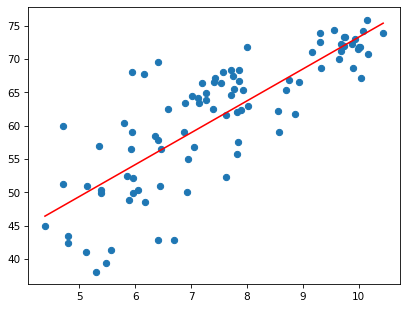

In [17]:
#Tracé de la droite de régression
xdte = np.linspace(min(x), max(x), 1000) # une suite de valeurs entre min(x) et max(x) 
Xdte = xdte[:, np.newaxis] # On rajoute une dim à xfit
print('Dimensions de X :',Xdte.ndim)
ydte = model.predict(Xdte) # On calcule les ordonnées sur la droite de régression (valeurs prédites)


#nuage de points
plt.scatter(x, y)
plt.plot(xdte, ydte,color='red') # droite de régression
print("Coef directeur de la droite de régression :    ", model.coef_[0])
print("Ordonnée à l'origine :", model.intercept_)

In [18]:
var_y=np.var(y)
y_predicted = model.predict(X)
res=y-y_predicted
np.set_printoptions(formatter={'float_kind':'{:f}'.format}) # afficher les résultats de np sous format décimal

var_expl=np.var(y_predicted)
var_resid=np.var(res)
print('Variance expliquée=',var_expl,' Variance résiduelle=',var_resid)
print('Variance totale=',var_expl+var_resid,' Variance de y =',var_y)
pour_expl=var_expl/var_y*100
pour_resid= var_resid/var_y*100
print('Part variance expliquée={part_expl:.1f}% Part variance résiduelle={part_resid:.1f}%'.\
      format(part_expl=pour_expl,part_resid=pour_resid))

Variance expliquée= 61.1276311103062  Variance résiduelle= 32.46048143648769
Variance totale= 93.5881125467939  Variance de y = 93.58811254679387
Part variance expliquée=65.3% Part variance résiduelle=34.7%


In [19]:
# les résultats de la régression simple montre que le PNB est significatif au seuil de 1%. Une augmentation de 1% du PNB conduit à une augmentation de 
#l'espérance de vie des hommes de 4 année et demie environ
import statsmodels.formula.api as smf

fii = smf.ols(formula='EspHommes ~ lnPNB', data=df).fit()
p_values = fii.summary2().tables[1]['P>|t|']
print(fii.summary2())
print('p-values :\n', p_values,'\n')


                 Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.649   
Dependent Variable: EspHommes        AIC:                578.9289
Date:               2023-05-09 23:59 BIC:                583.9507
No. Observations:   91               Log-Likelihood:     -287.46 
Df Model:           1                F-statistic:        167.6   
Df Residuals:       89               Prob (F-statistic): 3.56e-22
R-squared:          0.653            Scale:              33.190  
------------------------------------------------------------------
               Coef.   Std.Err.     t     P>|t|    [0.025   0.975]
------------------------------------------------------------------
Intercept     25.4726    2.8387   8.9733  0.0000  19.8322  31.1131
lnPNB          4.7804    0.3693  12.9460  0.0000   4.0467   5.5141
-----------------------------------------------------------------
Omnibus:               1.210        Durbin-Watson:          1.116
Prob(Omnibus):        